In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import scipy.stats
import statsmodels.api as sm
import pandas_datareader as pdr
import datetime as dt
from Ipython import markdown as md

# <font face="gotham" color="purple">Functional Forms</font>

Linear regression requires parameters to be linear rather than variables, for instance an exponential form is nonlinear
$$
Y_{i}=\beta_{1} X_{i}^{\beta_{2}} e^{u_{i}}
$$


Many of you might wonder what if variables are nonlinear, such as
$$
Y=\beta_{1}+\beta_{2} X_{2}^{3}+\beta_{3} \sqrt{X_{3}}+\beta_{4} \log X_{4} + u_i
$$
Actually, it doesn't matter, they are essentially linear after nonlinear operation performed. 
$$
Y=\beta_{1}+\beta_{2} Z_2+\beta_{3}Z_3+\beta_{4}Z_4+u_i
$$
where $Z_2 = X_{2}^{3}$, $Z_3 = \sqrt{X_{3}}$ and $Z_4 =\log X_{4}$.

But interpretation of parameters not the same anymore.

## <font face="gotham" color="purple">Log Form Transformation</font>

We will explain how log form transformation is used through an economics example.

If you have studied microeconomics, you probably remember the concept of elasticity, it is a unitless measurement of relative changes of two variables. For example, the price elasticity of demand is defined as
$$
\frac{\Delta C/C}{\Delta P/P} = \frac{d C/d P}{C/P}
$$
If price elasticity of demand is $.3$, it means one percent of price change would cause $.3%$ percent change of demand.

If $C$ and $P$ takes the form of $C = \beta_1 P^{\beta_2}$, then
$$
\frac{d C}{d P}=\beta_1 \beta_2 P^{\beta_2-1}= \beta_2\frac{C}{P}
$$
Substitute the result back in elasticity of consumption to price
$$
\frac{\Delta C/C}{\Delta P/P} = \beta_2
$$

$\beta_2$ is the elasticity, and this is also why we prefer using exponential form in estimating elasticities. Taking natural log on $C = \beta_1 P^{\beta_2}u$
$$
\ln{C} = \ln{\beta_1}+\beta_2\ln{P}+\ln{u}
$$
This, again, back to linear regression form. With cosmetic substitution, the model becomes
$$
C' = \beta_1'+\beta_2 P'+u'
$$

Here is the estimation procedure:
1. Take natural log of $C$ and $P$.
2. Estimate the regression by OLS.
3. $\beta_2$ has the direct interpretation of elasticity.
4. To obtain $\beta_1$, take $\exp{\beta_1'}$.

We will retrieve _Consumer Price Index_ and _Expenditure of Durable Good_ from FRED. 

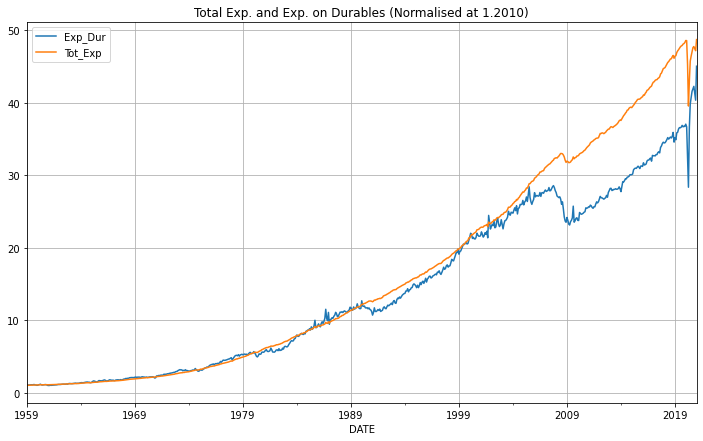

In [72]:
start = dt.datetime(1950, 1, 1)
end = dt.datetime(2021, 1, 1)
df_exp = pdr.data.DataReader(['PCEDG','PCE'], 'fred' , start, end)
df_exp.columns = ['Exp_Dur', 'Tot_Exp']
df_exp = df_exp.dropna()
(df_exp/df_exp.iloc[0]).plot(grid=True, figsize=(12, 7), title = 'Total Exp. and Exp. on Durables (Normalised at 1.2010)')
plt.show()

In [68]:
X = np.log(df_exp['Tot_Exp']) 
Y = np.log(df_exp['Exp_Dur'])

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                Exp_Dur   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.398e+05
Date:                Sat, 24 Jul 2021   Prob (F-statistic):               0.00
Time:                        18:20:51   Log-Likelihood:                 805.70
No. Observations:                 745   AIC:                            -1607.
Df Residuals:                     743   BIC:                            -1598.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4413      0.020    -72.514      0.0

In [80]:
md('That means every $1\%$ increase of total expenditure will bring up {:.4f}\% of durable good consumption.'.format(model.params[1]))

That means every $1\%$ increase of total expenditure will bring up 0.9242\% of durable good consumption.